In [ ]:
import pandas as pd
data= pd.read_csv('/content/drive/MyDrive/retail_sales_dataset.csv')
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
# Drop the 'Customer ID' column
data = data.drop(columns=['Customer ID'])

In [ ]:
data.head()

,Transaction ID,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,Male,34,Beauty,3,50,150
1,2,2023-02-27,Female,26,Clothing,2,500,1000
2,3,2023-01-13,Male,50,Electronics,1,30,30
3,4,2023-05-21,Male,37,Clothing,1,500,500
4,5,2023-05-06,Male,30,Beauty,2,50,100


In [ ]:
data.shape

(1000, 8)

In [ ]:
# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Gender            1000 non-null   object        
 3   Age               1000 non-null   int64         
 4   Product Category  1000 non-null   object        
 5   Quantity          1000 non-null   int64         
 6   Price per Unit    1000 non-null   int64         
 7   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 62.6+ KB


In [ ]:
data.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [ ]:
data.columns

Index(['Transaction ID', 'Date', 'Gender', 'Age', 'Product Category',
       'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Transaction ID      0
Date                0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [ ]:
# Print count of unique values in each column
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"Number of unique values in column '{column}': {unique_values}")


Number of unique values in column 'Transaction ID': 1000
Number of unique values in column 'Date': 345
Number of unique values in column 'Gender': 2
Number of unique values in column 'Age': 47
Number of unique values in column 'Product Category': 3
Number of unique values in column 'Quantity': 4
Number of unique values in column 'Price per Unit': 5
Number of unique values in column 'Total Amount': 18


In [ ]:
total_female_spending = data[data['Gender'] == 'Female']['Total Amount'].sum()
total_male_spending = data[data['Gender'] == 'Male']['Total Amount'].sum()

print("Total amount spent by females:", total_female_spending)
print("Total amount spent by males:", total_male_spending)

Total amount spent by females: 232840
Total amount spent by males: 223160


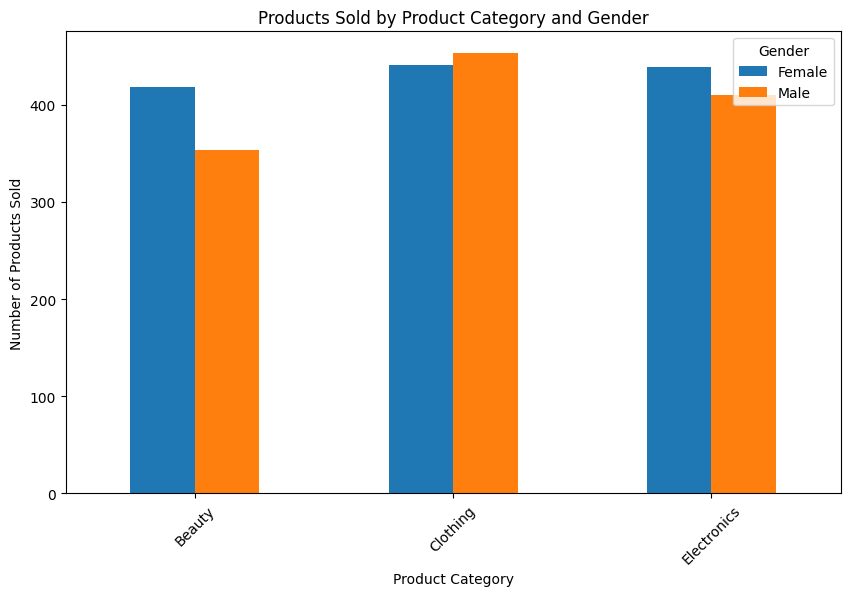

In [ ]:
grouped_df = data.groupby(['Product Category', 'Gender'])['Quantity'].sum().unstack()
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Products Sold by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [ ]:
# Separate categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
Index(['Gender', 'Product Category'], dtype='object')

Numerical Columns:
Index(['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount'], dtype='object')


In [ ]:
total_quantity_sold = data.groupby('Product Category')['Quantity'].sum()

print(total_quantity_sold)

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64


In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
Transaction ID,1.000000,0.065191,-0.026623,-0.060837,-0.075034
Age,0.065191,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.026623,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.060837,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.075034,-0.060568,0.373707,0.851925,1.000000


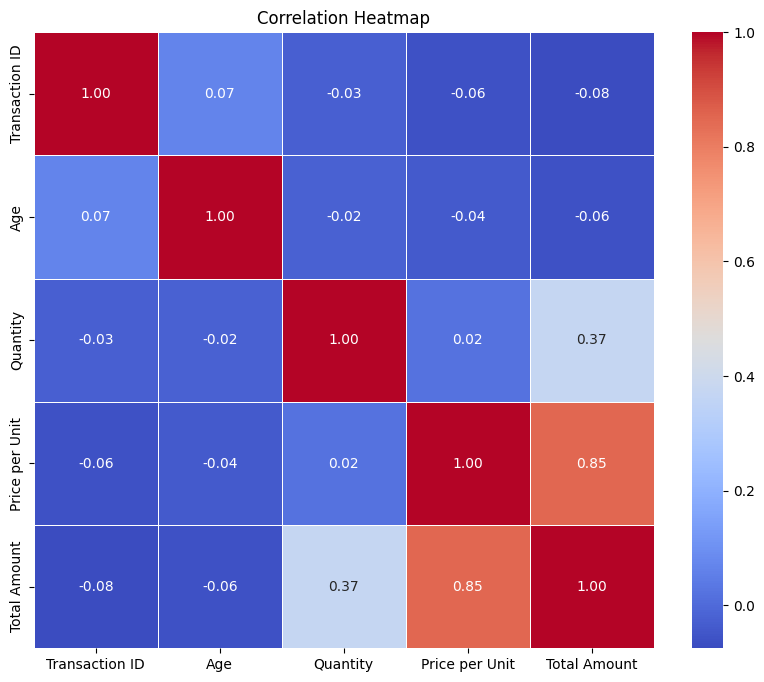

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

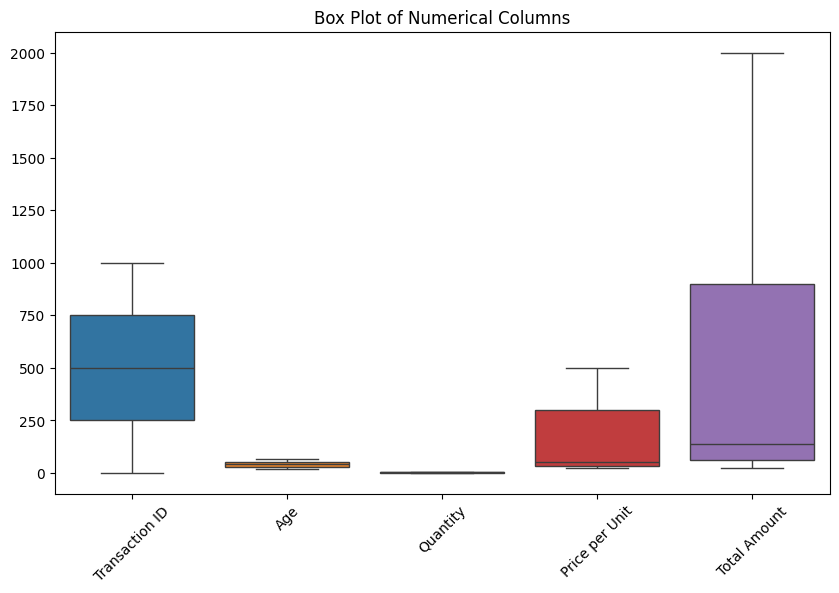

In [ ]:
numeric_columns = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_columns)
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

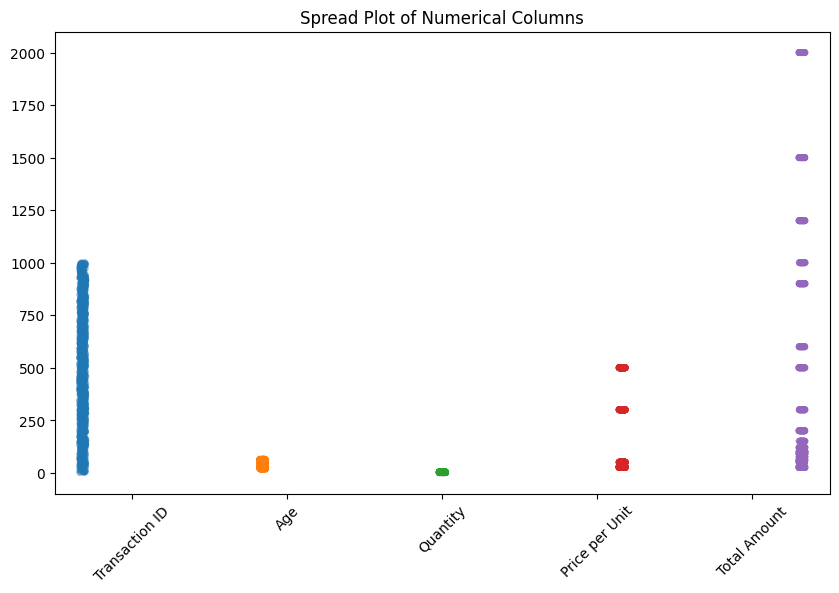

In [ ]:
# Create spread plot
plt.figure(figsize=(10, 6))
sns.stripplot(data=data, jitter=True, dodge=True, alpha=0.5)
plt.title('Spread Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from scipy.stats import zscore
data['Total Amount Z-Score'] = zscore(data['Total Amount'])
z_score_threshold = 3
outliers_zscore = data[abs(data['Total Amount Z-Score']) > z_score_threshold]

print("Outliers identified using Z-Score method:")
print(outliers_zscore)

Outliers identified using Z-Score method:
Empty DataFrame
Columns: [Transaction ID, Date, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount, Total Amount Z-Score]
Index: []


In [ ]:
Q1 = data['Total Amount'].quantile(0.25)
Q3 = data['Total Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = data[(data['Total Amount'] < (Q1 - 1.5 * IQR)) | (data['Total Amount'] > (Q3 + 1.5 * IQR))]

print("\nOutliers identified using IQR method:")
print(outliers_iqr)


Outliers identified using IQR method:
Empty DataFrame
Columns: [Transaction ID, Date, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount, Total Amount Z-Score]
Index: []


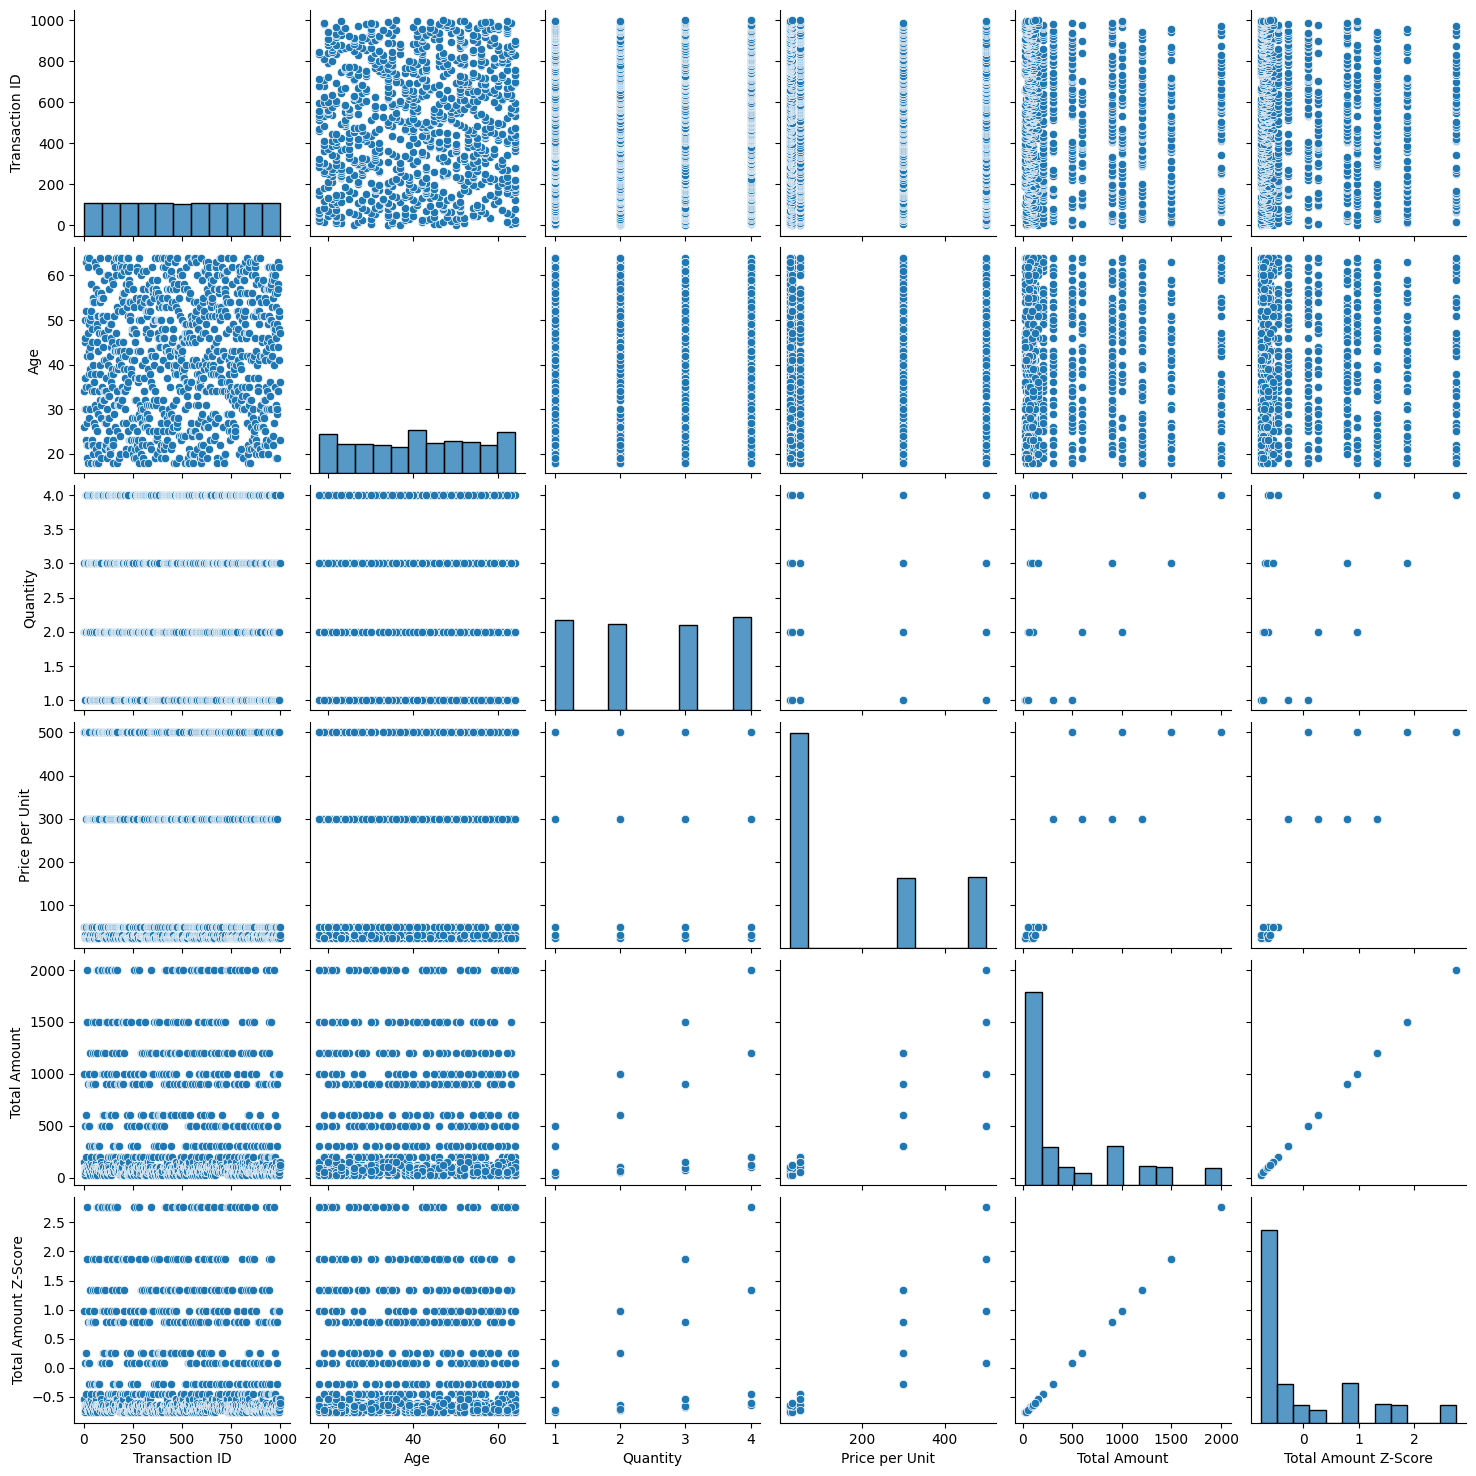

In [ ]:
sns.pairplot(data)

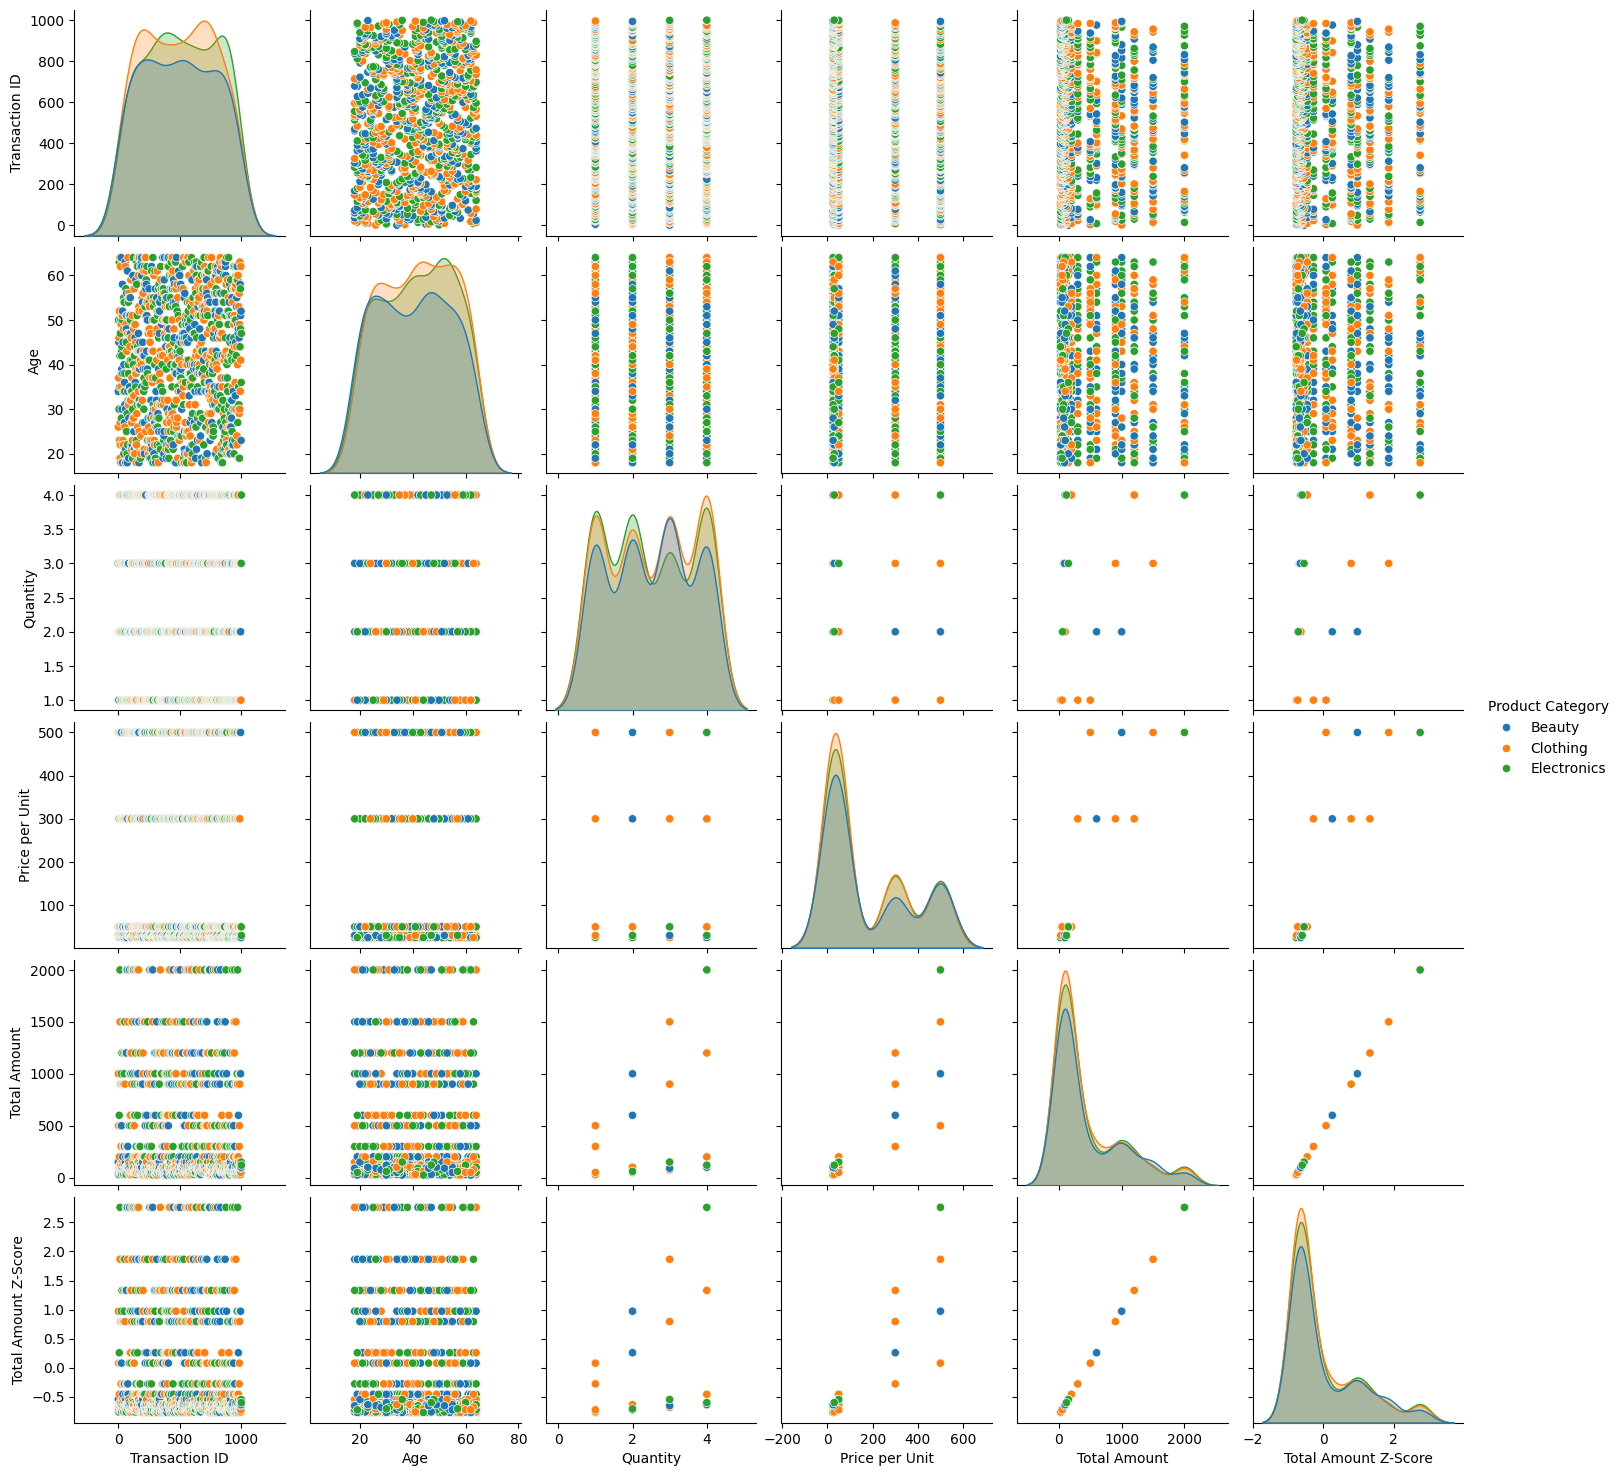

In [ ]:
sns.pairplot(data, hue="Product Category")